In [113]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoramos los warnings
# -----------------------------------------------------------------------
import warnings
warnings.simplefilter("ignore", FutureWarning)

import sys
sys.path.append("../../")
from src import soporte_enconding as se
from src import soporte_desbalanceo as sd
from src import soporte_outliers as so
from src import soporte_featurescaling as sf

# SKlearn
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Se utiliza para el iterative
# -----------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import chi2_contingency

In [114]:
data_pickle = pd.read_pickle("datos/data_final.pkl")
df = pd.DataFrame(data_pickle)

In [115]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [116]:
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

In [117]:
def detectar_orden_cat(lista_categoricas, var_res):
    lista_ordenas = []
    lista_desordenadas = []
    for categorica in lista_categoricas:
        print(f"Estamos evaluando la variable: {categorica.upper()}")
        df_cross_tab_gender = pd.crosstab(df[categorica], df[var_res])
        display(df_cross_tab_gender)

        chi2, p, dof, expected = chi2_contingency(df_cross_tab_gender)

        if p < 0.05:
            print(f"La variable categorica {categorica.upper()} si tiene orden\n")
            lista_ordenas.append(categorica)
        else:
            print(f"La variable categorica {categorica.upper()} no tiene orden\n")
            lista_desordenadas.append(categorica)

    return lista_ordenas, lista_desordenadas

In [118]:
lista_categoricas = X.select_dtypes(["O", "category"]).columns.to_list()
lista_categoricas

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'StockOptionLevel',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating']

In [119]:
df["Attrition"] = df["Attrition"].map({"No": 0, "Yes": 1})

In [120]:
lista_ordenadas, lista_desordenadas = detectar_orden_cat(df.select_dtypes(["object", "category"]), "Attrition")
diccionario_encoding = {"target": lista_ordenadas,
                        "onehot": lista_desordenadas}

print(lista_ordenadas)
print(lista_desordenadas)

encoding = se.Encoding(df, variable_respuesta="Attrition", diccionario_encoding=diccionario_encoding)
df_oh = encoding.one_hot_encoding()
display(df_oh.head())
df_target = encoding.target_encoding()
df_target.head()

Estamos evaluando la variable: BUSINESSTRAVEL


Attrition,0,1
BusinessTravel,,
Non-Travel,143,12
Travel_Frequently,214,75
Travel_Rarely,932,161


La variable categorica BUSINESSTRAVEL si tiene orden

Estamos evaluando la variable: DEPARTMENT


Attrition,0,1
Department,,
Human Resources,44,21
Research & Development,849,157
Sales,396,70


La variable categorica DEPARTMENT si tiene orden

Estamos evaluando la variable: EDUCATION


Attrition,0,1
Education,,
1,153,27
2,240,56
3,504,95
4,351,63
5,41,7


La variable categorica EDUCATION no tiene orden

Estamos evaluando la variable: EDUCATIONFIELD


Attrition,0,1
EducationField,,
Human Resources,16,12
Life Sciences,529,107
Marketing,139,26
Medical,401,78
Other,79,10
Technical Degree,125,15


La variable categorica EDUCATIONFIELD si tiene orden

Estamos evaluando la variable: GENDER


Attrition,0,1
Gender,,
Female,516,94
Male,773,154


La variable categorica GENDER no tiene orden

Estamos evaluando la variable: JOBLEVEL


Attrition,0,1
JobLevel,,
1,485,86
2,457,102
3,195,32
4,90,17
5,62,11


La variable categorica JOBLEVEL no tiene orden

Estamos evaluando la variable: JOBROLE


Attrition,0,1
JobRole,,
Healthcare Representative,118,21
Human Resources,47,7
Laboratory Technician,227,46
Manager,90,16
Manufacturing Director,138,16
Research Director,62,21
Research Scientist,249,54
Sales Executive,283,55
Sales Representative,75,12


La variable categorica JOBROLE no tiene orden

Estamos evaluando la variable: MARITALSTATUS


Attrition,0,1
MaritalStatus,,
Divorced,310,37
Married,617,85
Single,362,126


La variable categorica MARITALSTATUS si tiene orden

Estamos evaluando la variable: STOCKOPTIONLEVEL


Attrition,0,1
StockOptionLevel,,
0,549,111
1,532,94
2,134,28
3,74,15


La variable categorica STOCKOPTIONLEVEL no tiene orden

Estamos evaluando la variable: ENVIRONMENTSATISFACTION


Attrition,0,1
EnvironmentSatisfaction,,
1.0,221,74
2.0,254,44
3.0,410,67
4.0,404,63


La variable categorica ENVIRONMENTSATISFACTION si tiene orden

Estamos evaluando la variable: JOBSATISFACTION


Attrition,0,1
JobSatisfaction,,
1.0,229,69
2.0,243,49
3.0,387,76
4.0,430,54


La variable categorica JOBSATISFACTION si tiene orden

Estamos evaluando la variable: WORKLIFEBALANCE


Attrition,0,1
WorkLifeBalance,,
1.0,55,26
2.0,293,60
3.0,815,135
4.0,126,27


La variable categorica WORKLIFEBALANCE si tiene orden

Estamos evaluando la variable: JOBINVOLVEMENT


Attrition,0,1
JobInvolvement,,
1,71,19
2,325,61
3,770,141
4,123,27


La variable categorica JOBINVOLVEMENT no tiene orden

Estamos evaluando la variable: PERFORMANCERATING


Attrition,0,1
PerformanceRating,,
3,1095,207
4,194,41


La variable categorica PERFORMANCERATING no tiene orden

['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['Education', 'Gender', 'JobLevel', 'JobRole', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating']


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Education_1,Education_2,Education_3,Education_4,Education_5,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4
0,51,0,Travel_Rarely,Sales,6,Life Sciences,Married,131160,1.0,11,1.0,6,1,0,0,3.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,31,1,Travel_Frequently,Research & Development,10,Life Sciences,Single,41890,0.0,23,6.0,3,5,1,4,3.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,32,0,Travel_Frequently,Research & Development,17,Other,Married,193280,1.0,15,5.0,2,5,0,3,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,38,0,Non-Travel,Research & Development,2,Life Sciences,Married,83210,3.0,11,13.0,5,8,7,5,4.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,32,0,Travel_Rarely,Research & Development,10,Medical,Single,23420,4.0,12,9.0,2,6,0,4,4.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Education_1,Education_2,Education_3,Education_4,Education_5,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4
0,51,0,0.147301,0.150215,6,0.168239,0.121083,131160,1.0,11,1.0,6,1,0,0,0.140461,0.111570,0.169972,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,31,1,0.259516,0.156064,10,0.168239,0.258197,41890,0.0,23,6.0,3,5,1,4,0.140461,0.167808,0.176471,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,32,0,0.259516,0.156064,17,0.112409,0.121083,193280,1.0,15,5.0,2,5,0,3,0.147651,0.167808,0.320630,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,38,0,0.077419,0.156064,2,0.168239,0.121083,83210,3.0,11,13.0,5,8,7,5,0.134904,0.111570,0.142105,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,32,0,0.147301,0.156064,10,0.162839,0.258197,23420,4.0,12,9.0,2,6,0,4,0.134904,0.231544,0.142105,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [121]:
df_target.shape

(1537, 49)

In [122]:
feature_scaling = sf.FeatureScaling(df_target, df_target.select_dtypes(np.number).columns)
df_target = feature_scaling.min_max_scaler()

ZSCORE

La cantidad de outliers que tenemos para la columna AGE es  0
La cantidad de outliers que tenemos para la columna ATTRITION es  0
La cantidad de outliers que tenemos para la columna BUSINESSTRAVEL es  0
La cantidad de outliers que tenemos para la columna DEPARTMENT es  65
La cantidad de outliers que tenemos para la columna DISTANCEFROMHOME es  0
La cantidad de outliers que tenemos para la columna EDUCATIONFIELD es  28
La cantidad de outliers que tenemos para la columna MARITALSTATUS es  0
La cantidad de outliers que tenemos para la columna MONTHLYINCOME es  0
La cantidad de outliers que tenemos para la columna NUMCOMPANIESWORKED es  0
La cantidad de outliers que tenemos para la columna PERCENTSALARYHIKE es  0
La cantidad de outliers que tenemos para la columna TOTALWORKINGYEARS es  16
La cantidad de outliers que tenemos para la columna TRAININGTIMESLASTYEAR es  0
La cantidad de outliers que tenemos para la columna YEARSATCOMPANY es  25
La cantidad de outliers que tenemos para l

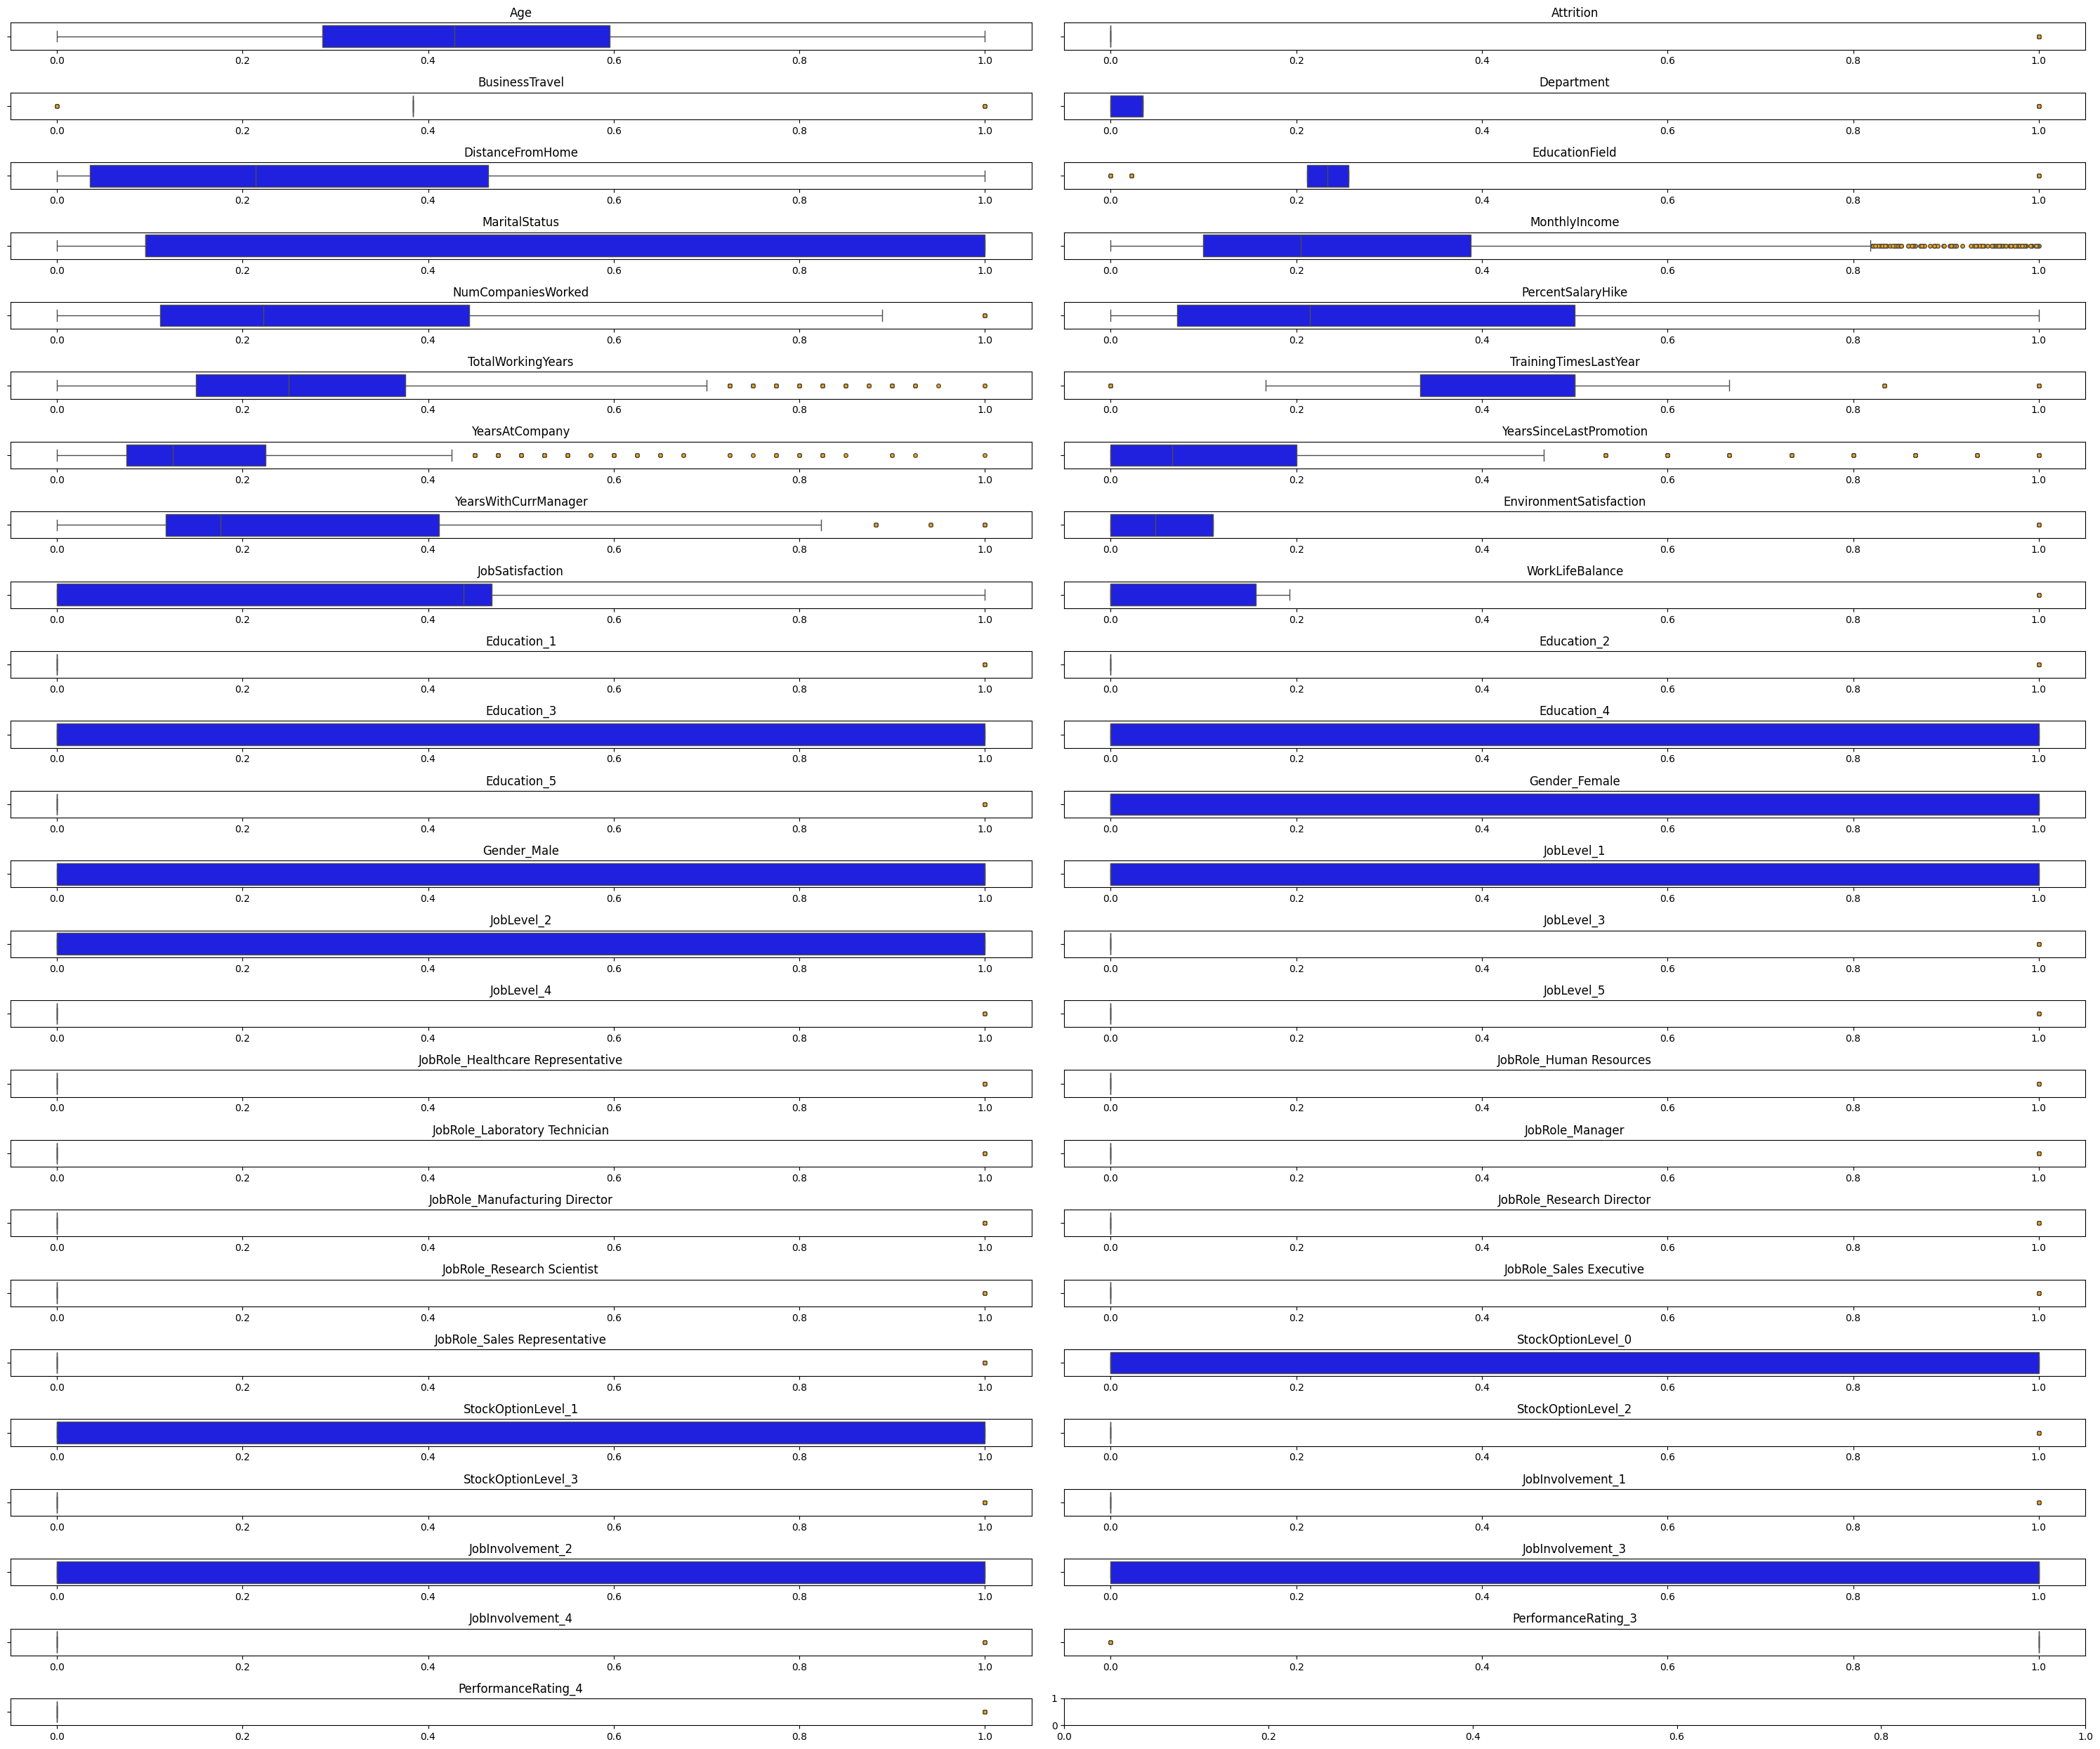

In [123]:
# Outliers
outliers_uni = so.GestionOutliersUnivariados(df_target)
print("ZSCORE\n")
outliers_uni.detectar_outliers_z_score()
print("\nIQR\n")
outliers_uni.detectar_outliers_iqr()
outliers_uni.visualizar_outliers_univariados(tamano_grafica=(30, 25))

In [124]:
outliers_multi = so.GestionOutliersMultivariados(df_target)
print(outliers_multi.detectar_outliers_if(0.01)["outlier"].value_counts())
outliers_multi.detectar_outliers_lof(50, 0.01)["outlier"].value_counts()
df_target = outliers_multi.detectar_outliers_lof(50, 0.1)
display(df_target.head())
df_target = outliers_multi.imputar_outliers(df_target, "mediana")
df_target.head()

outlier
 1    1521
-1      16
Name: count, dtype: int64


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Education_1,Education_2,Education_3,Education_4,Education_5,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4,outlier
0,0.785714,0.0,0.383762,0.000000,0.178571,0.256077,0.095365,0.637546,0.111111,0.000000,0.025,1.000000,0.025,0.000000,0.000000,0.047933,0.000000,0.156092,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.309524,1.0,1.000000,0.034188,0.321429,0.256077,1.000000,0.167457,0.000000,0.857143,0.150,0.500000,0.125,0.066667,0.235294,0.047933,0.468754,0.192496,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.333333,0.0,1.000000,0.034188,0.571429,0.022071,0.095365,0.964666,0.111111,0.285714,0.125,0.333333,0.125,0.000000,0.176471,0.109944,0.468754,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1
3,0.476190,0.0,0.000000,0.034188,0.035714,0.256077,0.095365,0.385045,0.333333,0.000000,0.325,0.833333,0.200,0.466667,0.294118,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
4,0.333333,0.0,0.383762,0.034188,0.321429,0.233444,1.000000,0.070195,0.444444,0.071429,0.225,0.333333,0.150,0.000000,0.235294,0.000000,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Education_1,Education_2,Education_3,Education_4,Education_5,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4
0,0.785714,0.0,0.383762,0.000000,0.178571,0.256077,0.095365,0.637546,0.111111,0.000000,0.025,1.000000,0.025,0.000000,0.000000,0.047933,0.000000,0.156092,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.309524,1.0,1.000000,0.034188,0.321429,0.256077,1.000000,0.167457,0.000000,0.857143,0.150,0.500000,0.125,0.066667,0.235294,0.047933,0.468754,0.192496,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.428571,0.0,0.383762,0.034188,0.214286,0.233444,0.095365,0.204792,0.222222,0.214286,0.250,0.500000,0.125,0.066667,0.176471,0.047933,0.438236,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.428571,0.0,0.383762,0.034188,0.214286,0.233444,0.095365,0.204792,0.222222,0.214286,0.250,0.500000,0.125,0.066667,0.176471,0.047933,0.438236,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.333333,0.0,0.383762,0.034188,0.321429,0.233444,1.000000,0.070195,0.444444,0.071429,0.225,0.333333,0.150,0.000000,0.235294,0.000000,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


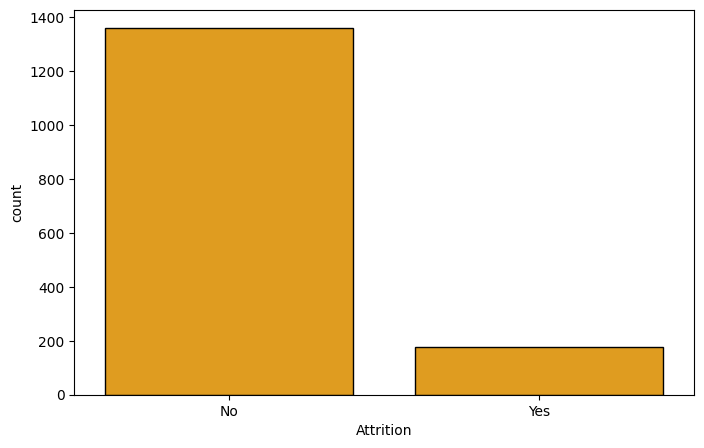

In [125]:
desbalanceo = sd.Desbalanceo(df_target, "Attrition")
desbalanceo.visualizar_clase()

In [126]:
df_target = desbalanceo.balancear_clases_smote_nc(lista_ordenadas)

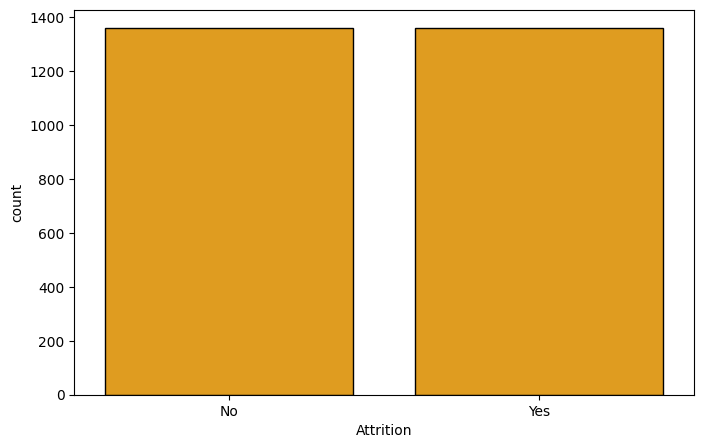

In [127]:
desbalanceo = sd.Desbalanceo(df_target, "Attrition")
desbalanceo.visualizar_clase()

In [128]:
df_target.to_pickle("datos/data_final_encoded.pkl")